In [26]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os

from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn.metrics import mean_squared_error

In [2]:
outdir = './data/processed_data'

In [ ]:
# Define a function to maximize kurtosis for the given component
def maximize_kurtosis(component, max_iter=100, tol=1e-6):
    for _ in range(max_iter):
        # Compute kurtosis
        current_kurtosis = kurtosis(component)
        # Update component to increase kurtosis
        # This step depends on the optimization technique used
        # For simplicity, you can use gradient ascent or other optimization techniques
        # Update the component here (e.g., component += step_size * gradient)
        # Check for convergence
        if np.abs(current_kurtosis - kurtosis(component)) < tol:
            break
    return component

## ICA on Diabetes Dataset

In [3]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"diabetes_data_train.csv" )    
X_train = pd.read_csv(filename)

In [4]:
X_train.shape

(183824, 21)

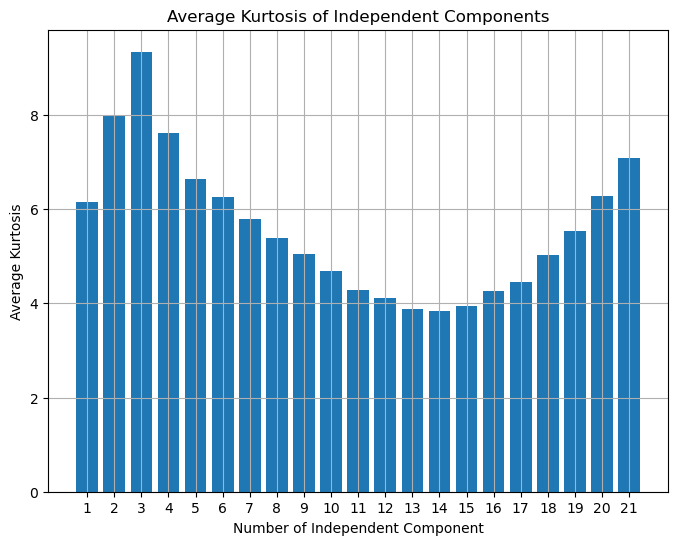

In [10]:
average_kurtosis = [
    np.mean(
        np.abs(
            kurtosis(
                FastICA(n_components = n, random_state = 42).fit_transform(X_train),
                    axis = 0,
                    fisher = False
                )
            )
        ) for n in range(1, X_train.shape[1] + 1)
    ]

plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(average_kurtosis)), average_kurtosis)
plt.xlabel('Number of Independent Component')
plt.ylabel('Average Kurtosis')
plt.title('Average Kurtosis of Independent Components')
plt.xticks(np.arange(len(average_kurtosis)), np.arange(1, len(average_kurtosis) + 1))
plt.grid(True)
plt.show()

In [11]:
n_optimal_components = np.argmax(average_kurtosis) + 1

n_optimal_components


3

In [12]:
ica = FastICA(n_components = n_optimal_components, random_state = 42)
X_train_reduced = ica.fit_transform(X_train)
X_train_reduced.shape

(183824, 3)

In [15]:
diabetes_df_reduced = pd.DataFrame(X_train_reduced)
diabetes_df_reduced.to_csv(os.path.join(outdir,f"reduced_diabetes_ica.csv" ),index=False)

## ICA on Insurance Dataset

In [16]:
# read data from the file and plot 
filename = os.path.join(outdir, f"insurance_data_train.csv" )    
X_train_insurance = pd.read_csv(filename)

In [17]:
X_train_insurance.shape

(46873, 40)

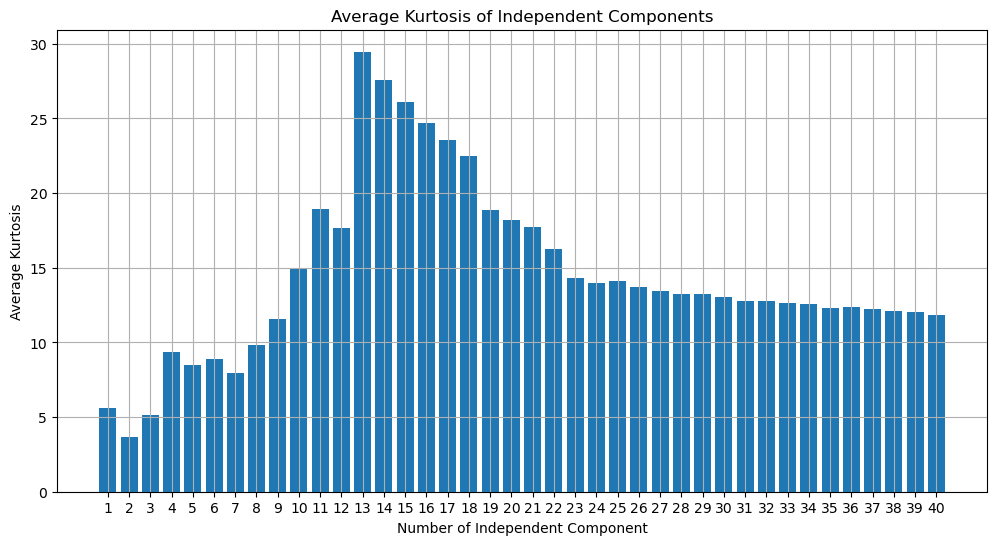

In [19]:
# Calculate average kurtosis values for Insurance data 

average_kurtosis_insurance = [
    np.mean(
        np.abs(
            kurtosis(
                FastICA(n_components = n, random_state = 42).fit_transform(X_train_insurance),
                    axis = 0,
                    fisher = False
                )
            )
        ) for n in range(1, X_train_insurance.shape[1] + 1)
    ]

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(average_kurtosis_insurance)), average_kurtosis_insurance)
plt.xlabel('Number of Independent Component')
plt.ylabel('Average Kurtosis')
plt.title('Average Kurtosis of Independent Components')
plt.xticks(np.arange(len(average_kurtosis_insurance)), np.arange(1, len(average_kurtosis_insurance) + 1))
plt.grid(True)
plt.show()

In [20]:
n_optimal__insurance_components = np.argmax(average_kurtosis_insurance) + 1

n_optimal__insurance_components


13

In [21]:
ica_insurance = FastICA(n_components = n_optimal__insurance_components, random_state = 42)
X_train_insurance_reduced = ica_insurance.fit_transform(X_train_insurance)
X_train_insurance_reduced.shape

(46873, 13)

In [ ]:
insurance_df_reduced = pd.DataFrame(X_train_insurance_reduced)
insurance_df_reduced.to_csv(os.path.join(outdir,f"reduced_insurance_ica.csv" ),index=False)